In [34]:
import requests as rq
import json
import oauth2
import base64

In [35]:
# Variables that contain user credentials to access Twitter API  
# KEEP SECRET
consumer_key = "vm0ZXNDEMBerHCi4wihF3Cfp4"
consumer_secret = "KatwZP4J9ctlyybMAVxBjmYWX1lgOGClQNQPJCGtEDEdRnqYn1"
access_token = "762750966-1qWfcRxsZIesZDpjR3AzQMG414mB0S60YPrurkmc"
access_secret = "XhiGvjI0QQJeQ6bnTyZvcxzN9zzQMz95wWiyio2SAETP2"

In [36]:
key_secret = '{}:{}'.format(consumer_key, consumer_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

# Code from http://benalexkeen.com/interacting-with-the-twitter-api-using-python/

In [37]:
base_url = 'https://api.twitter.com/'
auth_url = '{}oauth2/token'.format(base_url)

auth_headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}

auth_data = {
    'grant_type': 'client_credentials'
}

auth_resp = rq.post(auth_url, headers=auth_headers, data=auth_data)
access_token = auth_resp.json()['access_token']

In [38]:
#Get First Response to Have Next Token

endpoint = "https://api.twitter.com/1.1/tweets/search/30day/traveldev30.json" 
headers = {'Authorization': 'Bearer {}'.format(access_token)}
first_query = '{"query":"(travel OR ttot OR rtw OR traveltuesday OR traveling OR wanderlust OR vacation OR travelpics OR tourist) has:images lang:en"}'
first_response = rq.post(endpoint, data=first_query, headers=headers).json()

first_response

{'results': [{'created_at': 'Thu May 02 06:57:12 +0000 2019',
   'id': 1123843868741591041,
   'id_str': '1123843868741591041',
   'text': "RT @traveljabUK: Easter Island has been a designated UNESCO World Heritage Site since 1995. Its amazing statues are on many a photographer'…",
   'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
   'truncated': False,
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 555586953,
    'id_str': '555586953',
    'name': 'Jignesh Patel',
    'screen_name': 'jignesh263',
    'location': None,
    'url': None,
    'description': None,
    'translator_type': 'none',
    'protected': False,
    'verified': False,
    'followers_count': 62,
    'friends_count': 252,
    'listed_count': 0,
    'favourites_count': 322,
    'statuses_count': 363,
    'created_at': 'Mon Ap

In [39]:
with open('30dayfirst.txt', 'w') as file:  
    json.dump(first_response, file)

In [66]:
next_value_1 = first_response['next']

In [68]:
next_value_1

'eyJhdXRoZW50aWNpdHkiOiIyNWNmMzllOTIyNzNkN2QyN2EyMWVhYWQ0NTc5YjNmYmZiNzNkMzE4Y2M5YjY0NjhkNGNhMzJmYmQ0MmFlNDAwIiwiZnJvbURhdGUiOiIyMDE5MDQwMjAwMDAiLCJ0b0RhdGUiOiIyMDE5MDUwMjA2NTciLCJuZXh0IjoiMjAxOTA1MDIwNjU3MTMtMTEyMzg0MzEwOTk3MDkzOTkwNS0wIn0='

In [71]:
# First 30 Loops

location_list_1 = []
country_code_list_1 = []
country_list_1 = []
travel_count_1 = 0
ttot_count_1 = 0
rtw_count_1 = 0
traveltuesday_count_1 = 0
traveling_count_1 = 0
wanderlust_count_1 = 0
vacation_count_1 = 0
travelpics_count_1 = 0
tourist_count_1 = 0

loop_count_1 = 0

while loop_count_1<30:
    query_1 = '{"query":"(travel OR ttot OR rtw OR traveltuesday OR traveling OR wanderlust OR vacation OR travelpics OR tourist) has:images lang:en", "next":"' + next_value_1 + '"}'
    response_1 = rq.post(endpoint, data=query_1, headers=headers).json()
    print("Loop #:", loop_count_1)
    for tweet in response_1['results']:
        if tweet['user']['location'] != None:
            location_list_1.append(tweet['user']['location'])
        if tweet['place'] != None:
            country_code_list_1.append(tweet['place']['country_code'])
            country_list_1.append(tweet['place']['country'])
        if "travel" in tweet['text']:
            travel_count_1+=1
        if "ttot" in tweet['text']:
            ttot_count_1+=1
        if "rtw" in tweet['text']:
            rtw_count_1+=1
        if "traveltuesday" in tweet['text']:
            traveltuesday_count_1+=1
        if "traveling" in tweet['text']:
            traveling_count_1+=1
        if "wanderlust" in tweet['text']:
            wanderlust_count_1+=1
        if "vacation" in tweet['text']:
            vacation_count_1+=1
        if "travelpics" in tweet['text']:
            travelpics_count_1+=1
        if "tourist" in tweet['text']:
            tourist_count_1+=1
    try:
        next_value_1 = response_1['next']
        loop_count_1+=1
    except:
        print("No Next")
        break

Loop #: 0
Loop #: 1
Loop #: 2
Loop #: 3
Loop #: 4
Loop #: 5
Loop #: 6
Loop #: 7
Loop #: 8
Loop #: 9
Loop #: 10
Loop #: 11
Loop #: 12
Loop #: 13
Loop #: 14
Loop #: 15
Loop #: 16
Loop #: 17
Loop #: 18
Loop #: 19
Loop #: 20
Loop #: 21
Loop #: 22
Loop #: 23
Loop #: 24
Loop #: 25
Loop #: 26
Loop #: 27
Loop #: 28
Loop #: 29


In [72]:
with open('30dayfirst30.txt', 'w') as file:  
    json.dump(response_1, file)

In [73]:
next_value_2 = response_1['next']

In [74]:
next_value_2

'eyJhdXRoZW50aWNpdHkiOiJkYWMwOTFhNjEyNDdkNTBhZGM3ZDk2NTcxNjM2NGZmMWUwYjVkMzIzZGUxOTA2ZGEzZWNkOGYwYjcwYzE1ZDVmIiwiZnJvbURhdGUiOiIyMDE5MDQwMjAwMDAiLCJ0b0RhdGUiOiIyMDE5MDUwMjA2NTciLCJuZXh0IjoiMjAxOTA1MDIwNjU3MDAtMTEyMzgxMTU4NzI4MDc4NTQxMC0wIn0='

In [75]:
# Second 30 Loops

location_list_2 = []
country_code_list_2 = []
country_list_2 = []
travel_count_2 = 0
ttot_count_2 = 0
rtw_count_2 = 0
traveltuesday_count_2 = 0
traveling_count_2 = 0
wanderlust_count_2 = 0
vacation_count_2 = 0
travelpics_count_2 = 0
tourist_count_2 = 0

loop_count_2 = 0

while loop_count_2<30:
    query_2 = '{"query":"(travel OR ttot OR rtw OR traveltuesday OR traveling OR wanderlust OR vacation OR travelpics OR tourist) has:images lang:en", "next":"' + next_value_2 + '"}'
    response_2 = rq.post(endpoint, data=query_2, headers=headers).json()
    print("Loop #:", loop_count_2)
    for tweet in response_2['results']:
        if tweet['user']['location'] != None:
            location_list_2.append(tweet['user']['location'])
        if tweet['place'] != None:
            country_code_list_2.append(tweet['place']['country_code'])
            country_list_2.append(tweet['place']['country'])
        if "travel" in tweet['text']:
            travel_count_2+=1
        if "ttot" in tweet['text']:
            ttot_count_2+=1
        if "rtw" in tweet['text']:
            rtw_count_2+=1
        if "traveltuesday" in tweet['text']:
            traveltuesday_count_2+=1
        if "traveling" in tweet['text']:
            traveling_count_2+=1
        if "wanderlust" in tweet['text']:
            wanderlust_count_2+=1
        if "vacation" in tweet['text']:
            vacation_count_2+=1
        if "travelpics" in tweet['text']:
            travelpics_count_2+=1
        if "tourist" in tweet['text']:
            tourist_count_2+=1
    try:
        next_value_2 = response_2['next']
        loop_count_2+=1
    except:
        print("No Next")
        break

Loop #: 0
Loop #: 1
Loop #: 2
Loop #: 3
Loop #: 4
Loop #: 5
Loop #: 6
Loop #: 7
Loop #: 8
Loop #: 9
Loop #: 10
Loop #: 11
Loop #: 12
Loop #: 13
Loop #: 14
Loop #: 15
Loop #: 16
Loop #: 17
Loop #: 18
Loop #: 19
Loop #: 20
Loop #: 21
Loop #: 22
Loop #: 23
Loop #: 24
Loop #: 25
Loop #: 26
Loop #: 27
Loop #: 28
Loop #: 29


In [76]:
next_value_3 = response_2['next']
next_value_3

'eyJhdXRoZW50aWNpdHkiOiIyZDhhODcyZGU0MmE5YTlkMzRmN2UzMTgxMWFhMmRkMTZlNWI2NGVjOGI3OWFkNDIzMzU5ZWU2NmMzNWY4MzAwIiwiZnJvbURhdGUiOiIyMDE5MDQwMjAwMDAiLCJ0b0RhdGUiOiIyMDE5MDUwMjA2NTciLCJuZXh0IjoiMjAxOTA1MDIwNjU3MDAtMTEyMzc4Njc0NTUzODA3MjU4MS0wIn0='

In [77]:
# Third 30 Loops

location_list_3 = []
country_code_list_3 = []
country_list_3 = []
travel_count_3 = 0
ttot_count_3 = 0
rtw_count_3 = 0
traveltuesday_count_3 = 0
traveling_count_3 = 0
wanderlust_count_3 = 0
vacation_count_3 = 0
travelpics_count_3 = 0
tourist_count_3 = 0

loop_count_3 = 0

while loop_count_3<30:
    query_3 = '{"query":"(travel OR ttot OR rtw OR traveltuesday OR traveling OR wanderlust OR vacation OR travelpics OR tourist) has:images lang:en", "next":"' + next_value_3 + '"}'
    response_3 = rq.post(endpoint, data=query_3, headers=headers).json()
    print("Loop #:", loop_count_3)
    for tweet in response_3['results']:
        if tweet['user']['location'] != None:
            location_list_3.append(tweet['user']['location'])
        if tweet['place'] != None:
            country_code_list_3.append(tweet['place']['country_code'])
            country_list_3.append(tweet['place']['country'])
        if "travel" in tweet['text']:
            travel_count_3+=1
        if "ttot" in tweet['text']:
            ttot_count_3+=1
        if "rtw" in tweet['text']:
            rtw_count_3+=1
        if "traveltuesday" in tweet['text']:
            traveltuesday_count_3+=1
        if "traveling" in tweet['text']:
            traveling_count_3+=1
        if "wanderlust" in tweet['text']:
            wanderlust_count_3+=1
        if "vacation" in tweet['text']:
            vacation_count_3+=1
        if "travelpics" in tweet['text']:
            travelpics_count_3+=1
        if "tourist" in tweet['text']:
            tourist_count_3+=1
    try:
        next_value_3 = response_3['next']
        loop_count_3+=1
    except:
        print("No Next")
        break

Loop #: 0
Loop #: 1
Loop #: 2
Loop #: 3
Loop #: 4
Loop #: 5
Loop #: 6
Loop #: 7
Loop #: 8
Loop #: 9
Loop #: 10
Loop #: 11
Loop #: 12
Loop #: 13
Loop #: 14
Loop #: 15
Loop #: 16
Loop #: 17
Loop #: 18
Loop #: 19
Loop #: 20
Loop #: 21
Loop #: 22
Loop #: 23
Loop #: 24
Loop #: 25
Loop #: 26
Loop #: 27
Loop #: 28
Loop #: 29


In [107]:
# Combine Location Data

location = location_list_1 + location_list_2 + location_list_3
print(location[:10])
len(location)

['Chiang Mai, Thailand', 'Redcar, England', 'Botswana', 'Australia', 'Somewhere around', 'New York, USA', 'Barcelona, Espanya', 'United States', 'France', 'coimbatore']


6520

In [136]:
# Get User Home Location Histogram
import pandas
from collections import Counter
import matplotlib.pyplot as plt

location_countries = []
from country_list import countries_for_language
allcountries = dict(countries_for_language('en'))

for loc in location:
    if loc in allcountries:
        location_countries.append(loc)
print(location_countries)
        
#location_counts = Counter(location)
#df = pandas.DataFrame.from_dict(location_counts, orient='index')
#df_10 = df.nlargest(10, 0)
#print(df_10)

['PH', 'CL', 'AZ', 'LA', 'MA', 'PH', 'US', 'NC', 'MA', 'MA', 'PH', 'BR', 'NC', 'SC', 'SC', 'PA', 'MA', 'PA', 'US', 'PA', 'MG', 'US', 'US', 'MD', 'PH']


In [106]:
# Combine Country Code Data

country_code = country_code_list_1 + country_code_list_2 + country_code_list_3
print(country_code[:10])
len(country_code)

['US', 'TH', 'ES', 'TH', 'GB', 'GB', 'LK', 'SC', 'ZA', 'ZA']


146

In [108]:
# Combine Country Data

country = country_list_1 + country_list_2 + country_list_3
print(country[:10])
len(country)

['United States', 'Thailand', 'Spain', 'Thailand', 'United Kingdom', 'United Kingdom', 'Sri Lanka', 'Seychelles', 'South Africa', 'South Africa']


146

                              0
United States                52
South Africa                 11
Republic of the Philippines  10
India                         9
Thailand                      5
Canada                        5
Malaysia                      5
Japan                         5
Spain                         3
United Kingdom                3


<function matplotlib.pyplot.show(*args, **kw)>

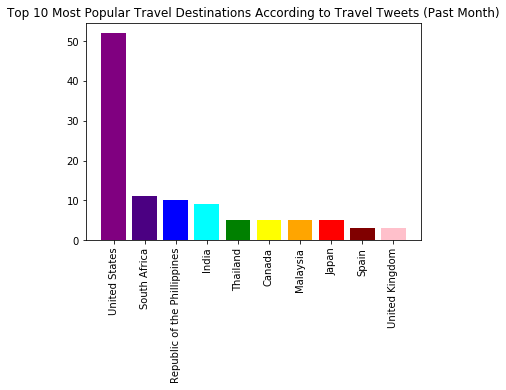

In [126]:
# Histogram of Top 10 Countries Tagged in Recent Travel Tweets
import pandas
from collections import Counter
import matplotlib.pyplot as plt

country_counts = Counter(country)
df = pandas.DataFrame.from_dict(country_counts, orient='index')
df_10 = df.nlargest(10, 0)
print(df_10)

countries_hist = ["United States", "South Africa", "Republic of the Phillippines", "India", "Thailand", "Canada", "Malaysia", "Japan", "Spain", "United Kingdom"]
values_hist = [52, 11, 10, 9, 5, 5, 5, 5, 3, 3]
plt.bar(countries_hist, values_hist, color=['purple', 'indigo', 'blue', 'cyan', 'green', 'yellow', 'orange', 'red', 'maroon', 'pink'])
plt.xticks(rotation=90)
plt.title("Top 10 Most Popular Travel Destinations According to Travel Tweets (Past Month)")
plt.savefig('TwitterDestinations.png', bbox_inches='tight')
plt.show

In [78]:
# Get Twitter Term Sums

travel_sum = travel_count_1 + travel_count_2 + travel_count_3
ttot_sum = ttot_count_1 + ttot_count_2 + ttot_count_3
rtw_sum = rtw_count_1 + rtw_count_2 + rtw_count_3
traveltuesday_sum = traveltuesday_count_1 + traveltuesday_count_2 + traveltuesday_count_3
traveling_sum = traveling_count_1 + traveling_count_2 + traveling_count_3
wanderlust_sum = wanderlust_count_1 + wanderlust_count_2 + wanderlust_count_3
vacation_sum = vacation_count_1 + vacation_count_2 + vacation_count_3
travelpics_sum = travelpics_count_1 + travelpics_count_2 + travelpics_count_3
tourist_sum = tourist_count_1 + tourist_count_2 + tourist_count_3

total_sum = travel_sum + ttot_sum + rtw_sum + traveltuesday_sum + traveling_sum + wanderlust_sum + vacation_sum + travelpics_sum + tourist_sum

5497


In [81]:
# Get Twitter Term Percentages
travel_per = travel_sum/total_sum
ttot_per = ttot_sum/total_sum
rtw_per = rtw_sum/total_sum
traveltuesday_per = traveltuesday_sum/total_sum
traveling_per = traveling_sum/total_sum
wanderlust_per = wanderlust_sum/total_sum
vacation_per = vacation_sum/total_sum
travelpics_per = travelpics_sum/total_sum
tourist_per = tourist_sum/total_sum

value = travel_per + ttot_per + rtw_per + traveltuesday_per + traveling_per + wanderlust_per + vacation_per + travelpics_per + tourist_per
print(value)

1.0


In [95]:
# Pie Chart 

import plotly
import plotly.graph_objs as go
import plotly.plotly as py
plotly.tools.set_credentials_file(username='jettbc', api_key='8VidWyDnyfWQHDHBwzzA')

labels = ['tourist','travelpics','vacation','wanderlust','traveling','rtw','ttot','travel','traveltuesday']
values = [tourist_per, travelpics_per, vacation_per, wanderlust_per, traveling_per, rtw_per, ttot_per, travel_per, traveltuesday_per]

trace = go.Pie(labels=labels, values=values,hoverinfo='label', 
               textfont=dict(size=20))

layout = dict(title = 'Popularity of Terms in Travel Tweets (past month)')

fig = dict(data=[trace], layout=layout)
py.iplot(fig, filename='Twitter_popular_term_pie')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jettbc/0 or inside your plot.ly account where it is named 'Twitter_popular_term_pie'
